<a href="https://colab.research.google.com/github/JoseM741/Desafio_TelecomX/blob/main/Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.-Extracción y Carga de los Datos 📌

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

## 2.- Revisión de los Datos ✔️

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.shape

(7267, 6)

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
###Normalizar las Columnas que se encuentran anidadas

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


In [ ]:
### Juntar todo y eliminar las columnas originales del df
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
     customer_df, phone_df, internet_df, account_df], axis=1)

In [ ]:
### Verificamos los cambios realizados

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
###Nombres de las Columnas

df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

##3.- Transformación de los Datos y revisión de consistencias de ellos ✔️

In [ ]:
### Renombrar columnas para una mejor revisión

df.rename(columns={
    'customerID': 'ID',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'servicio_multilinea',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'forma_pago',
    'Charges.Monthly': 'gastos_mensual',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

In [ ]:
df.columns

Index(['ID', 'abandono', 'genero', 'mayor_de_65', 'tiene_pareja',
       'tiene_dependentes', 'meses_contrato', 'servicio_telefonico',
       'servicio_multilinea', 'servicio_internet', 'seguridad_en_linea',
       'soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico',
       'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
       'facturas_electronicas', 'forma_pago', 'gastos_mensual',
       'gastos_totales'],
      dtype='object')

In [ ]:
### Ver cuántos valores ausentes hay en cada columna
valores_ausentes = df.isnull().sum()
valores_ausentes

,0
ID,0
abandono,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_contrato,0
servicio_telefonico,0
servicio_multilinea,0
servicio_internet,0


In [ ]:
#### Mostrar solo las columnas que tienen valores ausentes
print(valores_ausentes[valores_ausentes > 0])

Series([], dtype: int64)


In [ ]:
###Revisar el total de valores ausentes en todo el DataFrame:
valores_ausentes = df.isnull().sum().sum()
print(f'Total de valores ausentes: {valores_ausentes}')

Total de valores ausentes: 0


In [ ]:
####Ver cuantas filas duplicadas hay
duplicados = df.duplicated().sum()
print(f'Total de filas duplicadas: {duplicados}')

Total de filas duplicadas: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   abandono                 7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependentes        7267 non-null   object 
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   servicio_multilinea      7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  servicio_tv             

In [ ]:
df.head()

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
###Revisando conteo de Valores en Columnas

for col in df.columns:
    print(col, (df[col].isna() | (df[col].astype(str).str.strip() == '')).sum())


ID 0
abandono 224
genero 0
mayor_de_65 0
tiene_pareja 0
tiene_dependentes 0
meses_contrato 0
servicio_telefonico 0
servicio_multilinea 0
servicio_internet 0
seguridad_en_linea 0
soporte_en_linea 0
proteccion_dispositivos 0
soporte_tecnico 0
servicio_tv 0
servicio_peliculas 0
tipo_contrato 0
facturas_electronicas 0
forma_pago 0
gastos_mensual 0
gastos_totales 11


In [ ]:
### Para revisar si los conteos obtenidos corresponden a NaN o Strings Vacíos

for col in df.columns:
    n_nan = df[col].isna().sum()
    n_empty = (df[col].astype(str).str.strip() == '').sum()
    print(f"{col} → NaN: {n_nan}, Vacíos: {n_empty}")

ID → NaN: 0, Vacíos: 0
abandono → NaN: 0, Vacíos: 224
genero → NaN: 0, Vacíos: 0
mayor_de_65 → NaN: 0, Vacíos: 0
tiene_pareja → NaN: 0, Vacíos: 0
tiene_dependentes → NaN: 0, Vacíos: 0
meses_contrato → NaN: 0, Vacíos: 0
servicio_telefonico → NaN: 0, Vacíos: 0
servicio_multilinea → NaN: 0, Vacíos: 0
servicio_internet → NaN: 0, Vacíos: 0
seguridad_en_linea → NaN: 0, Vacíos: 0
soporte_en_linea → NaN: 0, Vacíos: 0
proteccion_dispositivos → NaN: 0, Vacíos: 0
soporte_tecnico → NaN: 0, Vacíos: 0
servicio_tv → NaN: 0, Vacíos: 0
servicio_peliculas → NaN: 0, Vacíos: 0
tipo_contrato → NaN: 0, Vacíos: 0
facturas_electronicas → NaN: 0, Vacíos: 0
forma_pago → NaN: 0, Vacíos: 0
gastos_mensual → NaN: 0, Vacíos: 0
gastos_totales → NaN: 0, Vacíos: 11


##4.- Reemplazo de Valores, para continuar con el análisis ✔️

In [ ]:
###Tratando los strings vacios como valores nulos, para reemplazarlos con NaN y contarlos

df['abandono'] = df['abandono'].replace('', np.nan)
df['abandono'].isna().sum()

np.int64(224)

Porcentajes de faltantes:

abandono → 224 uni / 7267 ≈ 3.08%

gastos_totales → 11 uni / 7267 ≈ 0.15%

Conclusión:

Los valores de 3% para Abandono y 0.15% para Gastos Totales, son mínimos, en función del total de Datos.

Sin embargo, los trataremos para no desvirtuar la Data:

3% en abandono, → Los trataremos como "Desconocido".-

0.15% en gastos_totales → Reemplazaremos los valores por media o mediana.

In [ ]:
###Reemplazando NaN en abandono, por Desconocido

df['abandono'] = df['abandono'].fillna('Desconocido')

In [ ]:
from pandas.api.types import infer_dtype

In [ ]:
print(df['abandono'].describe())

count     7267
unique       3
top         No
freq      5174
Name: abandono, dtype: object


In [ ]:
print(df['abandono'].value_counts())

abandono
No             5174
Yes            1869
Desconocido     224
Name: count, dtype: int64


In [ ]:
df.head()

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##5.- Transformación de columnas a Binarios ✔️

In [ ]:
###Vamos a definir las columnas que tienen Yes/No, como binarias

cols_binarias = [
    'abandono', 'tiene_pareja', 'tiene_dependentes', 'servicio_telefonico',
    'servicio_multilinea', 'soporte_en_linea', 'proteccion_dispositivos',
    'soporte_tecnico', 'servicio_tv', 'servicio_peliculas', 'facturas_electronicas'
]

In [ ]:
df[cols_binarias].value_counts()

abandono     tiene_pareja  tiene_dependentes  servicio_telefonico  servicio_multilinea  soporte_en_linea     proteccion_dispositivos  soporte_tecnico      servicio_tv          servicio_peliculas   facturas_electronicas
No           No            No                 Yes                  No                   No internet service  No internet service      No internet service  No internet service  No internet service  No                       360
             Yes           Yes                Yes                  No                   No internet service  No internet service      No internet service  No internet service  No internet service  No                       275
             No            No                 Yes                  No                   No internet service  No internet service      No internet service  No internet service  No internet service  Yes                      143
Yes          No            No                 Yes                  No                   No                   No                       No                   No                   No                   Yes                      112
No           No            No                 Yes                  No                   No                   No                       No                   No                   No                   Yes                       96
                                                                                                                                                                                                                             ... 
Desconocido  No            No                 Yes                  No                   No                   Yes                      Yes                  Yes                  Yes                  Yes                        1
                                                                                        Yes                  No                       No                   No                   No                   No                         1
                                                                                                                                      Yes                  No                   No                   No                         1
Yes          Yes           Yes                Yes                  Yes                  Yes                  No                       No                   Yes                  No                   Yes                        1
                                                                                                                                      Yes                  No                   No                   Yes                        1
Name: count, Length: 1177, dtype: int64

In [ ]:
###Revisamos que tipos de datos hay en las otras columnas que tienen Yes y NO

df[cols_binarias].apply(lambda x: x.unique())

,0
abandono,"[No, Yes, Desconocido]"
tiene_pareja,"[Yes, No]"
tiene_dependentes,"[Yes, No]"
servicio_telefonico,"[Yes, No]"
servicio_multilinea,"[No, Yes, No phone service]"
soporte_en_linea,"[Yes, No, No internet service]"
proteccion_dispositivos,"[No, Yes, No internet service]"
soporte_tecnico,"[Yes, No, No internet service]"
servicio_tv,"[Yes, No, No internet service]"
servicio_peliculas,"[No, Yes, No internet service]"


In [ ]:
# Contar cuántas veces aparece cada valor específico por columna
valores_a_buscar = ['No phone service', 'No internet service']

for valor in valores_a_buscar:
    print(f"\nConteo de '{valor}' por columna:")
    print((df == valor).sum())



Conteo de 'No phone service' por columna:
ID                           0
abandono                     0
genero                       0
mayor_de_65                  0
tiene_pareja                 0
tiene_dependentes            0
meses_contrato               0
servicio_telefonico          0
servicio_multilinea        707
servicio_internet            0
seguridad_en_linea           0
soporte_en_linea             0
proteccion_dispositivos      0
soporte_tecnico              0
servicio_tv                  0
servicio_peliculas           0
tipo_contrato                0
facturas_electronicas        0
forma_pago                   0
gastos_mensual               0
gastos_totales               0
dtype: int64

Conteo de 'No internet service' por columna:
ID                            0
abandono                      0
genero                        0
mayor_de_65                   0
tiene_pareja                  0
tiene_dependentes             0
meses_contrato                0
servicio_telefonico    

In [ ]:
# Revisar cantidad de NaN en las columnas binarias
print("Cantidad de NaN por columna:")
print(df[cols_binarias].isnull().sum())


Cantidad de NaN por columna:
abandono                   0
tiene_pareja               0
tiene_dependentes          0
servicio_telefonico        0
servicio_multilinea        0
soporte_en_linea           0
proteccion_dispositivos    0
soporte_tecnico            0
servicio_tv                0
servicio_peliculas         0
facturas_electronicas      0
dtype: int64


In [ ]:
# Revisar valores únicos por columna.
print("\nValores únicos por columna:")
for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")



Valores únicos por columna:
abandono: ['No' 'Yes' 'Desconocido']
tiene_pareja: ['Yes' 'No']
tiene_dependentes: ['Yes' 'No']
servicio_telefonico: ['Yes' 'No']
servicio_multilinea: ['No' 'Yes' 'No phone service']
soporte_en_linea: ['Yes' 'No' 'No internet service']
proteccion_dispositivos: ['No' 'Yes' 'No internet service']
soporte_tecnico: ['Yes' 'No' 'No internet service']
servicio_tv: ['Yes' 'No' 'No internet service']
servicio_peliculas: ['No' 'Yes' 'No internet service']
facturas_electronicas: ['Yes' 'No']


In [ ]:
# Ver recuento de valores únicos por columna.
for col in cols_binarias:
    print(f"\nRecuento en {col}:")
    print(df[col].value_counts(dropna=False))



Recuento en abandono:
abandono
No             5174
Yes            1869
Desconocido     224
Name: count, dtype: int64

Recuento en tiene_pareja:
tiene_pareja
No     3749
Yes    3518
Name: count, dtype: int64

Recuento en tiene_dependentes:
tiene_dependentes
No     5086
Yes    2181
Name: count, dtype: int64

Recuento en servicio_telefonico:
servicio_telefonico
Yes    6560
No      707
Name: count, dtype: int64

Recuento en servicio_multilinea:
servicio_multilinea
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Recuento en soporte_en_linea:
soporte_en_linea
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Recuento en proteccion_dispositivos:
proteccion_dispositivos
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

Recuento en soporte_tecnico:
soporte_tecnico
No                     3582
Yes                    2104
N

##6.- Reemplazo de columnas strings a No ✔️

In [ ]:
###En vista que tenemos otros valores en algunas columnas, realizaremos el reemplazo de estos Strings a "No"

df[cols_binarias] = df[cols_binarias].replace(['Desconocido','No phone service', 'No internet service'], 'No')

In [ ]:
###Reemplazamos Yes/No por 1 y 0.-

df[cols_binarias] = df[cols_binarias].replace({'Yes': 1, 'No': 0})

<ipython-input-350-2304089683>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
# Revisamos nuevamente valores únicos por columna.
print("\nValores únicos por columna:")
for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")


Valores únicos por columna:
abandono: [0 1]
tiene_pareja: [1 0]
tiene_dependentes: [1 0]
servicio_telefonico: [1 0]
servicio_multilinea: [0 1]
soporte_en_linea: [1 0]
proteccion_dispositivos: [0 1]
soporte_tecnico: [1 0]
servicio_tv: [1 0]
servicio_peliculas: [0 1]
facturas_electronicas: [1 0]


In [ ]:
#### Revisamos recuento de valores únicos por columna (para confirmar que estan todas las filas)
for col in cols_binarias:
    print(f"\nRecuento en {col}:")
    print(df[col].value_counts(dropna=False))
    print(f"Total de valores en {col}: {df[col].count()}")


Recuento en abandono:
abandono
0    5398
1    1869
Name: count, dtype: int64
Total de valores en abandono: 7267

Recuento en tiene_pareja:
tiene_pareja
0    3749
1    3518
Name: count, dtype: int64
Total de valores en tiene_pareja: 7267

Recuento en tiene_dependentes:
tiene_dependentes
0    5086
1    2181
Name: count, dtype: int64
Total de valores en tiene_dependentes: 7267

Recuento en servicio_telefonico:
servicio_telefonico
1    6560
0     707
Name: count, dtype: int64
Total de valores en servicio_telefonico: 7267

Recuento en servicio_multilinea:
servicio_multilinea
0    4202
1    3065
Name: count, dtype: int64
Total de valores en servicio_multilinea: 7267

Recuento en soporte_en_linea:
soporte_en_linea
0    4763
1    2504
Name: count, dtype: int64
Total de valores en soporte_en_linea: 7267

Recuento en proteccion_dispositivos:
proteccion_dispositivos
0    4776
1    2491
Name: count, dtype: int64
Total de valores en proteccion_dispositivos: 7267

Recuento en soporte_tecnico:
sopor

In [ ]:
###Revisamos nuevamente si las columnas tienen a NaN o Strings Vacíos

for col in df.columns:
    n_nan = df[col].isna().sum()
    n_empty = (df[col].astype(str).str.strip() == '').sum()
    print(f"{col} → NaN: {n_nan}, Vacíos: {n_empty}")

ID → NaN: 0, Vacíos: 0
abandono → NaN: 0, Vacíos: 0
genero → NaN: 0, Vacíos: 0
mayor_de_65 → NaN: 0, Vacíos: 0
tiene_pareja → NaN: 0, Vacíos: 0
tiene_dependentes → NaN: 0, Vacíos: 0
meses_contrato → NaN: 0, Vacíos: 0
servicio_telefonico → NaN: 0, Vacíos: 0
servicio_multilinea → NaN: 0, Vacíos: 0
servicio_internet → NaN: 0, Vacíos: 0
seguridad_en_linea → NaN: 0, Vacíos: 0
soporte_en_linea → NaN: 0, Vacíos: 0
proteccion_dispositivos → NaN: 0, Vacíos: 0
soporte_tecnico → NaN: 0, Vacíos: 0
servicio_tv → NaN: 0, Vacíos: 0
servicio_peliculas → NaN: 0, Vacíos: 0
tipo_contrato → NaN: 0, Vacíos: 0
facturas_electronicas → NaN: 0, Vacíos: 0
forma_pago → NaN: 0, Vacíos: 0
gastos_mensual → NaN: 0, Vacíos: 0
gastos_totales → NaN: 0, Vacíos: 11


Para la Columna gastos_totales, tiene 11 Vacios

Revisaremos si tiene una distribución muy sesgada,
(por ejemplo, algunos clientes gastan mucho más que otros),

En este caso convertiremos los faltantes en un dato de tipo (mediana)
Si es más o menos simétrica, Reemplazaremos por (media)

In [ ]:
####Modificando gastos_totales tiene 11 Vacíos
####Revisamos los datos
df['gastos_totales'] = pd.to_numeric(df['gastos_totales'], errors='coerce')
print(df['gastos_totales'].describe())

count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: gastos_totales, dtype: float64


In [ ]:
###De acuerdo a los resultados obtenidos veamos cual es la mediana de la columna gastos_totales

mediana = df['gastos_totales'].median()
print(f'La mediana de la columna "gastos_totales" es: {mediana}')

La mediana de la columna "gastos_totales" es: 1391.0


In [ ]:
###Reenplazamos los valores que estaban vacios, por la mediana calculada

df['gastos_totales'].fillna(mediana, inplace=True)

<ipython-input-356-474394258>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
###Verificamos que no existan valores nulos

print(df["gastos_totales"].isnull().sum())

0


In [ ]:
###Verificamos que no existan valores vacios

print((df["gastos_totales"] == "").sum())

0


In [ ]:
###Revisamos total de filas

print(len(df["gastos_totales"]))

7267


In [ ]:
###Otra revisión

print(df.shape[0])

7267


In [ ]:
df.head()

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
#### Convertir columnas a tipo entero ---
df[cols_binarias] = df[cols_binarias].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   abandono                 7267 non-null   int64  
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   int64  
 5   tiene_dependentes        7267 non-null   int64  
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   int64  
 8   servicio_multilinea      7267 non-null   int64  
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   int64  
 12  proteccion_dispositivos  7267 non-null   int64  
 13  soporte_tecnico          7267 non-null   int64  
 14  servicio_tv             

##7.-Crear columna de cuentas diarias ✔️

In [ ]:
df['cuentas_diarias'] = df['gastos_mensual'].astype(float) / 30

In [ ]:
df.head()

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   abandono                 7267 non-null   int64  
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   int64  
 5   tiene_dependentes        7267 non-null   int64  
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   int64  
 8   servicio_multilinea      7267 non-null   int64  
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   int64  
 12  proteccion_dispositivos  7267 non-null   int64  
 13  soporte_tecnico          7267 non-null   int64  
 14  servicio_tv             

##8.- Respaldo del nuevo DataFrame 💾

In [ ]:
###Guardar arhivo
df.to_csv('df_telecomx.csv', index=False)

##9.- Análisis clientes 🔎

In [ ]:
# Instalación de seaborn si es necesario
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Vista previa
df.head()

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [ ]:
###Revisión de Abandono
print(df['abandono'].value_counts())

abandono
0    5398
1    1869
Name: count, dtype: int64


In [ ]:
###Revisión Tipo de Contrato
print(df['tipo_contrato'].value_counts())

tipo_contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [ ]:
print(df[['tipo_contrato']])

       tipo_contrato
0           One year
1     Month-to-month
2     Month-to-month
3     Month-to-month
4     Month-to-month
...              ...
7262        One year
7263  Month-to-month
7264  Month-to-month
7265        Two year
7266        Two year

[7267 rows x 1 columns]


In [ ]:
print(df['tipo_contrato'].value_counts())

tipo_contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [ ]:
# Información general
df.info()

# Valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   abandono                 7267 non-null   int64  
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   int64  
 5   tiene_dependentes        7267 non-null   int64  
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   int64  
 8   servicio_multilinea      7267 non-null   int64  
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   int64  
 12  proteccion_dispositivos  7267 non-null   int64  
 13  soporte_tecnico          7267 non-null   int64  
 14  servicio_tv             

In [ ]:
# Variables numéricas
variables_numericas = ['meses_contrato', 'gastos_mensual', 'gastos_totales', 'cuentas_diarias']

In [ ]:
df.describe()

,abandono,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,facturas_electronicas,gastos_mensual,gastos_totales,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##10.-Revisión de variables categóricas del DF ✅

In [ ]:
# Lista de variables categóricas en el DataFrame
categoricas = ['abandono', 'mayor_de_65', 'tiene_pareja', 'tiene_dependentes',
               'servicio_telefonico', 'servicio_multilinea', 'soporte_en_linea',
               'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv',
               'servicio_peliculas', 'facturas_electronicas']

# Convertir todas las variables categóricas a tipo 'category'
for col in categoricas:
    df[col] = df[col].astype('category')

# Verificar que se hayan convertido correctamente
print(df.dtypes)

ID                           object
abandono                   category
genero                       object
mayor_de_65                category
tiene_pareja               category
tiene_dependentes          category
meses_contrato                int64
servicio_telefonico        category
servicio_multilinea        category
servicio_internet            object
seguridad_en_linea           object
soporte_en_linea           category
proteccion_dispositivos    category
soporte_tecnico            category
servicio_tv                category
servicio_peliculas         category
tipo_contrato                object
facturas_electronicas      category
forma_pago                   object
gastos_mensual              float64
gastos_totales              float64
cuentas_diarias             float64
dtype: object


##11. Gráficos 📊 📈 📉

Evasión según tipo de Gastos: Mensual, Anual, Bianual

abandono
0    5398
1    1869
Name: count, dtype: int64


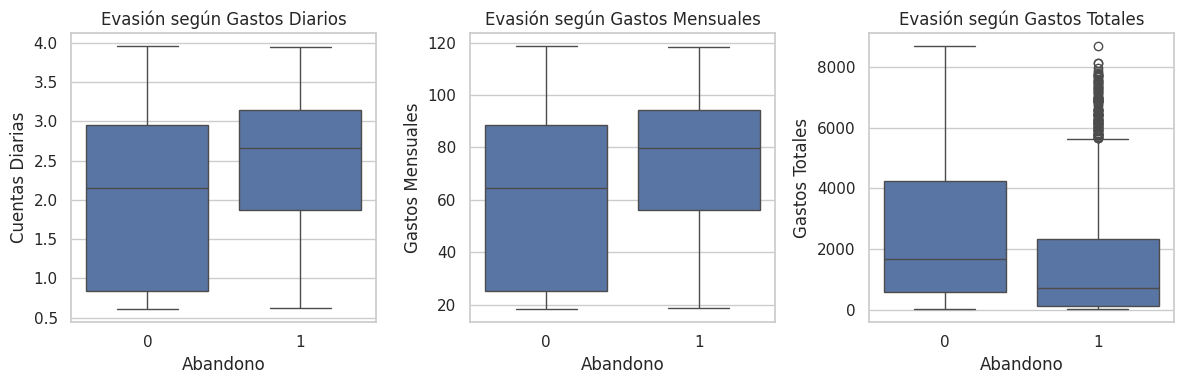

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Revisar valores únicos de abandono para confirmar
print(df['abandono'].value_counts())

# Configuración estética
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Boxplot Gastos Diarios
sns.boxplot(x='abandono', y='cuentas_diarias', data=df, ax=axes[0])
axes[0].set_title('Evasión según Gastos Diarios')
axes[0].set_xlabel('Abandono')
axes[0].set_ylabel('Cuentas Diarias')

# Boxplot Gastos Mensuales
sns.boxplot(x='abandono', y='gastos_mensual', data=df, ax=axes[1])
axes[1].set_title('Evasión según Gastos Mensuales')
axes[1].set_xlabel('Abandono')
axes[1].set_ylabel('Gastos Mensuales')

# Boxplot Gastos Totales
sns.boxplot(x='abandono', y='gastos_totales', data=df, ax=axes[2])
axes[2].set_title('Evasión según Gastos Totales')
axes[2].set_xlabel('Abandono')
axes[2].set_ylabel('Gastos Totales')

# Ajustar espacio
plt.tight_layout()
plt.show()


Distribución de Evasión y no Evasión según tipo Contrato

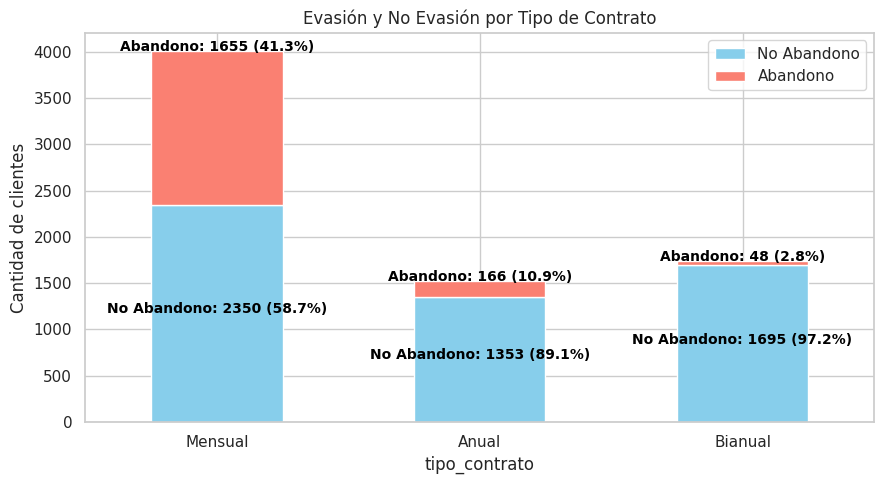

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reordenar categorías
orden_categorias = ["Mensual", "Anual", "Bianual"]
df["tipo_contrato"] = df["tipo_contrato"].replace({
    "Month-to-month": "Mensual",
    "One year": "Anual",
    "Two year": "Bianual"
})
df["tipo_contrato"] = pd.Categorical(df["tipo_contrato"], categories=orden_categorias, ordered=True)

# Agrupar por tipo de contrato y abandono
grouped = df.groupby(["tipo_contrato", "abandono"], observed=True).size().unstack(fill_value=0)

# Calcular porcentajes de abandono y no abandono
grouped["Porcentaje Abandono"] = grouped[1] / (grouped[0] + grouped[1]) * 100
grouped["Porcentaje No Abandono"] = 100 - grouped["Porcentaje Abandono"]

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(9, 5))

# Gráfico de barras (cantidad)
colors = ["skyblue", "salmon"]
grouped[[0, 1]].plot(kind="bar", stacked=True, ax=ax1, color=colors)
ax1.set_ylabel("Cantidad de clientes")
ax1.set_title("Evasión y No Evasión por Tipo de Contrato")
ax1.legend(["No Abandono", "Abandono"])

# Agregar etiquetas en la parte superior de cada barra en color negro
for i, tipo in enumerate(orden_categorias):
    total_clientes = grouped.loc[tipo, 0] + grouped.loc[tipo, 1]
    abandono = grouped.loc[tipo, 1]
    no_abandono = grouped.loc[tipo, 0]
    porcentaje_abandono = grouped.loc[tipo, "Porcentaje Abandono"]
    porcentaje_no_abandono = grouped.loc[tipo, "Porcentaje No Abandono"]

    # Etiqueta con cantidad de abandono y porcentaje en negro
    ax1.text(i, total_clientes + 2, f"Abandono: {abandono} ({porcentaje_abandono:.1f}%)",
             ha="center", fontsize=10, fontweight="bold", color="black")

    # Etiqueta con cantidad de no abandono y porcentaje en negro
    ax1.text(i, no_abandono / 2, f"No Abandono: {no_abandono} ({porcentaje_no_abandono:.1f}%)",
             ha="center", fontsize=10, fontweight="bold", color="black")

# Ajuste visual
ax1.set_xticklabels(orden_categorias, rotation=0)

plt.tight_layout()
plt.show()


Top de Categorias asosiadas a la evasión en contrato Mensual

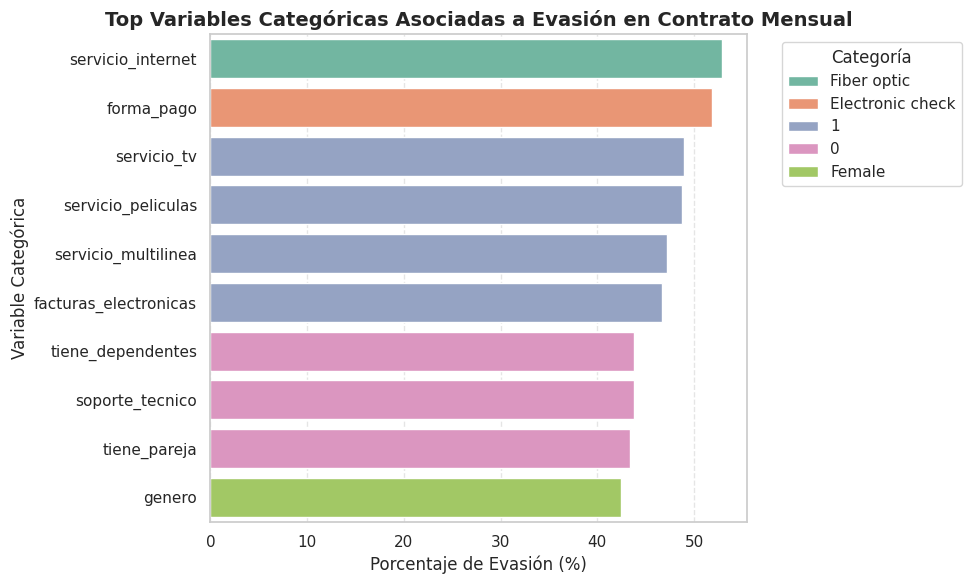

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo contratos mensuales
df_mensual = df[df['tipo_contrato'] == 'Mensual'].copy()

# Convertir 'abandono' a entero para poder calcular el promedio
df_mensual['abandono'] = df_mensual['abandono'].astype(int)

# Variables categóricas a evaluar
variables_categoricas = [
    'genero', 'tiene_pareja', 'tiene_dependentes', 'servicio_telefonico',
    'servicio_multilinea', 'servicio_internet', 'proteccion_dispositivos',
    'soporte_tecnico', 'servicio_tv', 'servicio_peliculas',
    'facturas_electronicas', 'forma_pago'
]

# Calcular porcentaje de evasión por categoría en cada variable
resultados = []

for variable in variables_categoricas:
    for categoria in df_mensual[variable].dropna().unique():
        subset = df_mensual[df_mensual[variable] == categoria]
        porcentaje_evasion = subset['abandono'].mean() * 100
        resultados.append({
            'variable': variable,
            'categoria': categoria,
            'porcentaje_evasion': porcentaje_evasion
        })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Ordenar por mayor evasión promedio
df_top = df_resultados.sort_values(by='porcentaje_evasion', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top,
    y='variable', x='porcentaje_evasion', hue='categoria',
    palette='Set2'
)

plt.xlabel('Porcentaje de Evasión (%)', fontsize=12)
plt.ylabel('Variable Categórica', fontsize=12)
plt.title('Top Variables Categóricas Asociadas a Evasión en Contrato Mensual', fontsize=14, fontweight='bold')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Distribución Evasión de Clientes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


# Calcular frecuencia de evasores y no evasores
evasion_counts = df['abandono'].value_counts().reset_index()
evasion_counts.columns = ['abandono', 'cantidad']
evasion_counts['abandono'] = evasion_counts['abandono'].map({0: 'no evade', 1: 'evade'})

# Graficar con Plotly

fig = px.bar(
    evasion_counts,
    x='abandono',
    y='cantidad',
    color='abandono',
    title='Distribución de evasión de clientes',
    text='cantidad'
    )
fig.update_traces(textposition='outside')

# Ajustar tamaño del gráfico
fig.update_layout(showlegend=False, width=400, height=600)

# Mostrar el gráfico
fig.show()

Proporción Evasión de Clientes

In [ ]:
# Calcular proporciones de evasores y no evasores
evasion_counts = df['abandono'].value_counts().reset_index()
evasion_counts.columns = ['abandono', 'cantidad']
evasion_counts['abandono'] = evasion_counts['abandono'].map({0: 'no evade', 1: 'evade'})

# Crear gráfico de pastel interactivo
fig = px.pie(
    evasion_counts,
    names='abandono',
    values='cantidad',
    title='Proporción de evasión de clientes',
    color='abandono'
)

# Ajustar tamaño del gráfico
fig.update_layout(width=400, height=400)

# Mostrar el gráfico
fig.show()

Histograma con KDE (Density Plot)

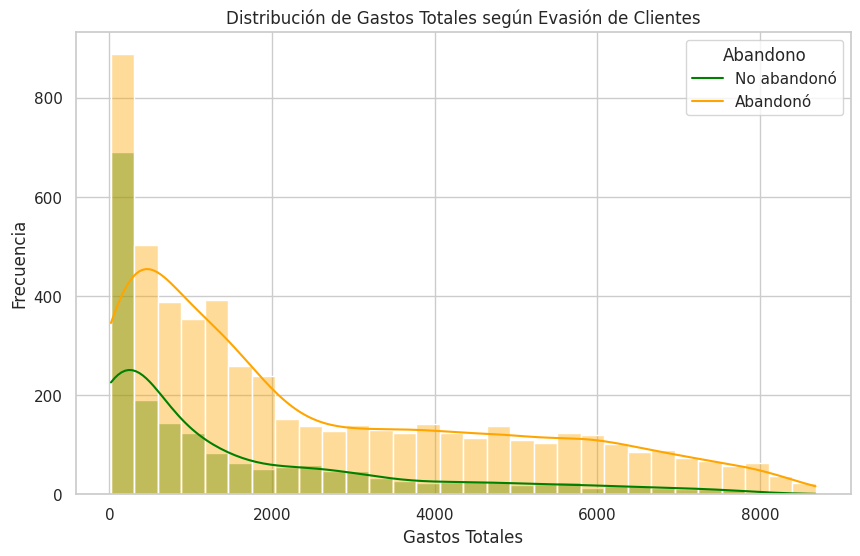

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Convertir abandono a tipo categórico
df['abandono'] = df['abandono'].astype(str)

sns.histplot(x=df['gastos_totales'], kde=True, bins=30, hue=df['abandono'],
             palette=["#FFA500", "#008000"], alpha=0.4
)

plt.title('Distribución de Gastos Totales según Evasión de Clientes')
plt.xlabel('Gastos Totales')
plt.ylabel('Frecuencia')
plt.legend(title='Abandono', labels=['No abandonó', 'Abandonó'])

plt.show()

Abando según tipo de Contrato

Porcentaje de Abandono según Tipo de Contrato:
abandono                0          1
contrato_largo                      
Largo           93.590627   6.409373
Normal          69.463549  30.536451


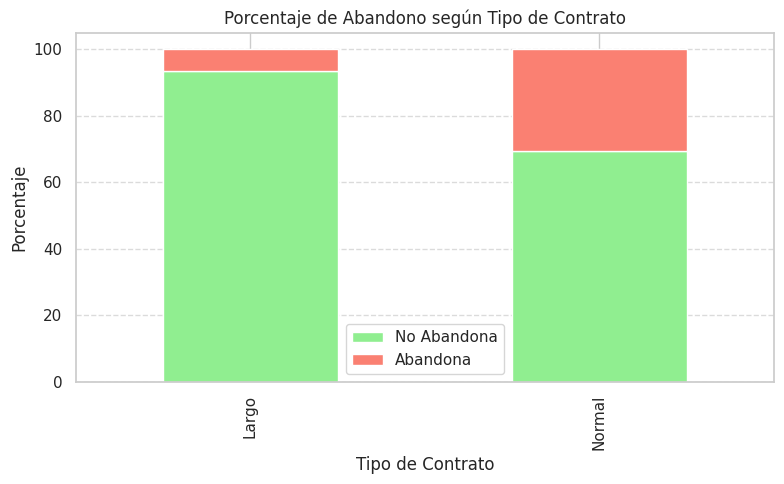

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear columna que clasifique contratos como "Largo" si supera 60 meses
df['contrato_largo'] = df['meses_contrato'].apply(lambda x: 'Largo' if x > 60 else 'Normal')

# Contar abandono según tipo de contrato
abandono_contrato = df.groupby(['contrato_largo', 'abandono']).size().unstack()

# Calcular porcentaje de abandono dentro de cada tipo de contrato
porcentajes = abandono_contrato.div(abandono_contrato.sum(axis=1), axis=0) * 100

# Mostrar tabla de porcentajes
print("Porcentaje de Abandono según Tipo de Contrato:")
print(porcentajes)

# Gráfico de barras comparativo con porcentajes
porcentajes.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(8,5))
plt.title('Porcentaje de Abandono según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje')
plt.legend(['No Abandona', 'Abandona'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()